In [30]:
install.packages("e0171",repos='https://cran.r-project.org')

Warning message:
“package ‘e0171’ is not available (for R version 3.3.2)”

In [28]:
library(caTools)
library(rpart)
library(rpart.plot)
library(ggplot2)
library(ggthemes)
library(e1071)

ERROR: Error in library(e1071): there is no package called ‘e1071’


In [11]:
data=read.csv('creditcard.csv')


In [12]:
summary(data)

      Time              V1                  V2                  V3          
 Min.   :     0   Min.   :-56.40751   Min.   :-72.71573   Min.   :-48.3256  
 1st Qu.: 54202   1st Qu.: -0.92037   1st Qu.: -0.59855   1st Qu.: -0.8904  
 Median : 84692   Median :  0.01811   Median :  0.06549   Median :  0.1799  
 Mean   : 94814   Mean   :  0.00000   Mean   :  0.00000   Mean   :  0.0000  
 3rd Qu.:139320   3rd Qu.:  1.31564   3rd Qu.:  0.80372   3rd Qu.:  1.0272  
 Max.   :172792   Max.   :  2.45493   Max.   : 22.05773   Max.   :  9.3826  
       V4                 V5                   V6                 V7          
 Min.   :-5.68317   Min.   :-113.74331   Min.   :-26.1605   Min.   :-43.5572  
 1st Qu.:-0.84864   1st Qu.:  -0.69160   1st Qu.: -0.7683   1st Qu.: -0.5541  
 Median :-0.01985   Median :  -0.05434   Median : -0.2742   Median :  0.0401  
 Mean   : 0.00000   Mean   :   0.00000   Mean   :  0.0000   Mean   :  0.0000  
 3rd Qu.: 0.74334   3rd Qu.:   0.61193   3rd Qu.:  0.3986   3rd Qu

In [13]:
colnames(data)[31] ='Fraud'
data$Fraud=as.factor(data$Fraud)

In [14]:
str(data)


'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

In [15]:
names(data)

[1] "Time"   "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"    
 [9] "V8"     "V9"     "V10"    "V11"    "V12"    "V13"    "V14"    "V15"   
[17] "V16"    "V17"    "V18"    "V19"    "V20"    "V21"    "V22"    "V23"   
[25] "V24"    "V25"    "V26"    "V27"    "V28"    "Amount" "Fraud"

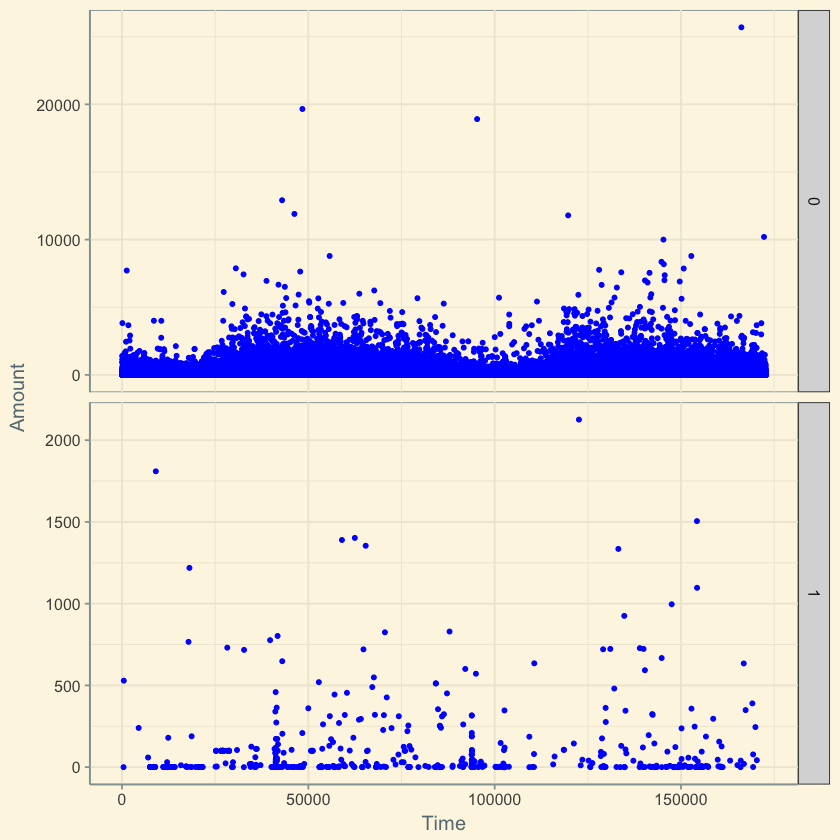

In [16]:
ggplot(data=data,aes(x=Time,y=Amount))+
  geom_point(alpha=1,colour = 'blue', size=1)+
  facet_grid(Fraud~.,scales = "free_y")+
  theme_solarized()

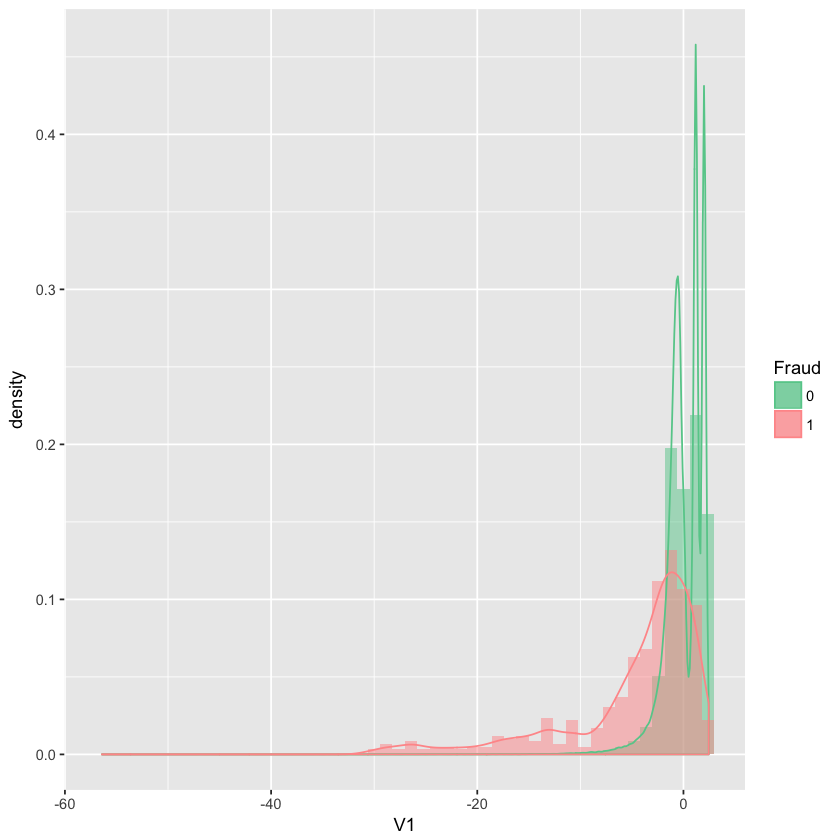

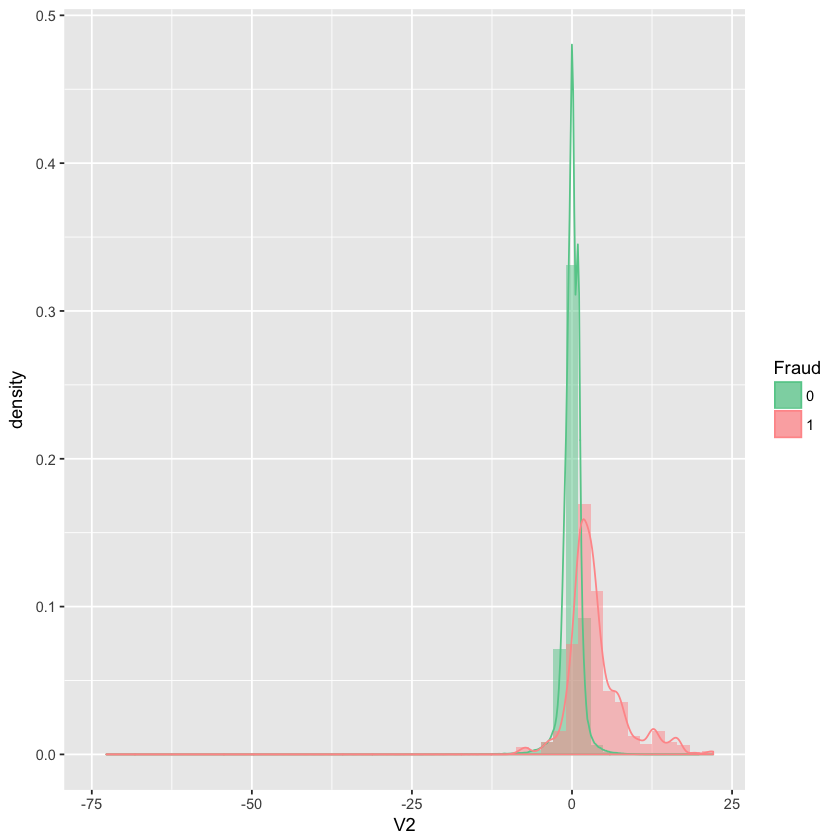

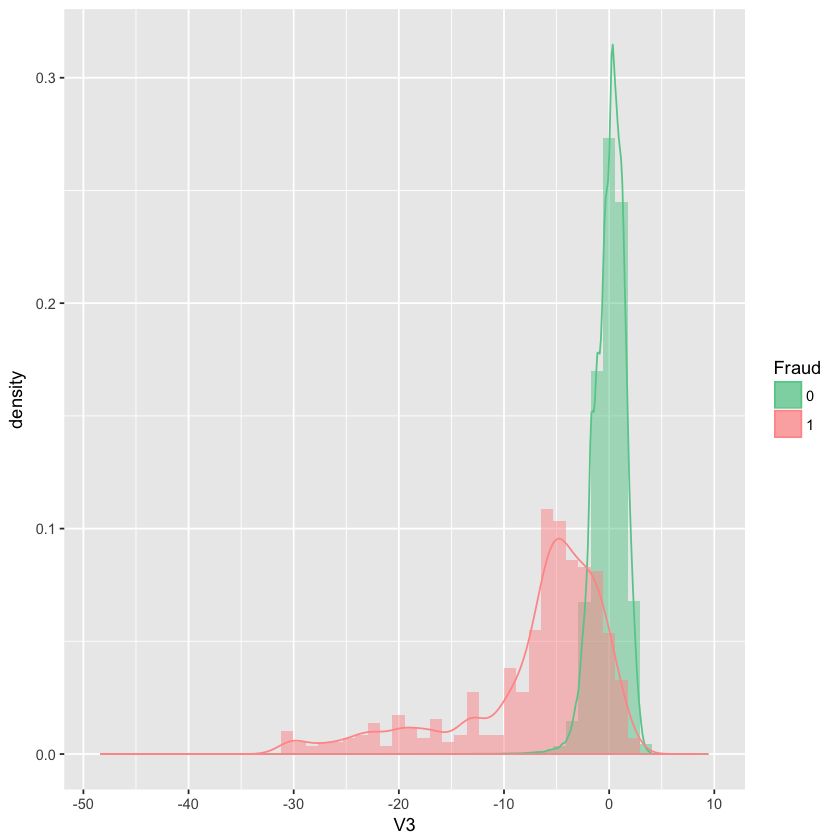

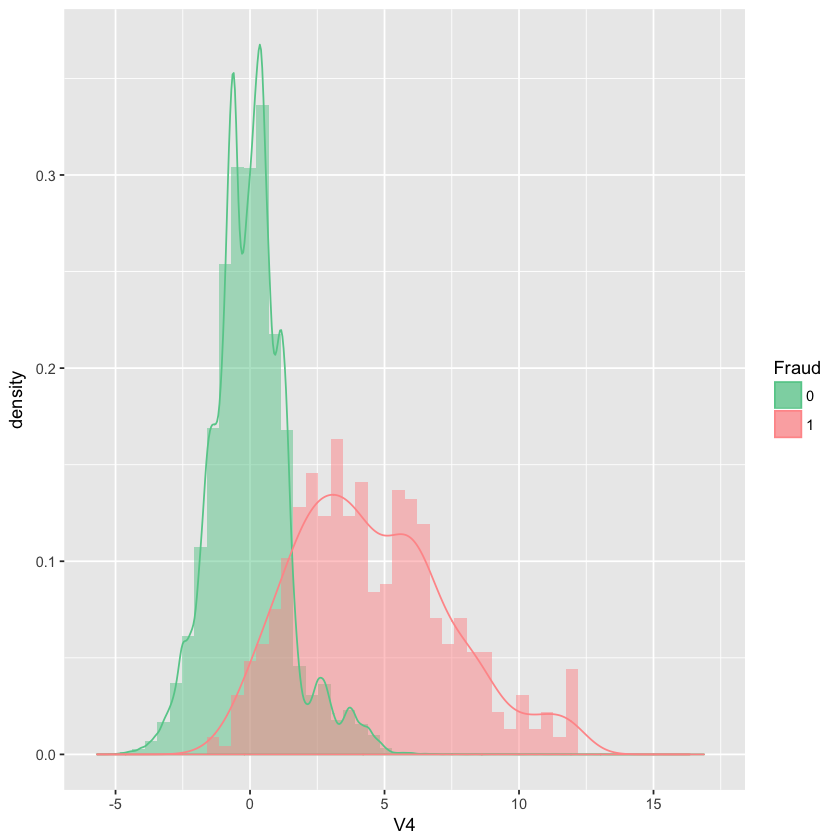

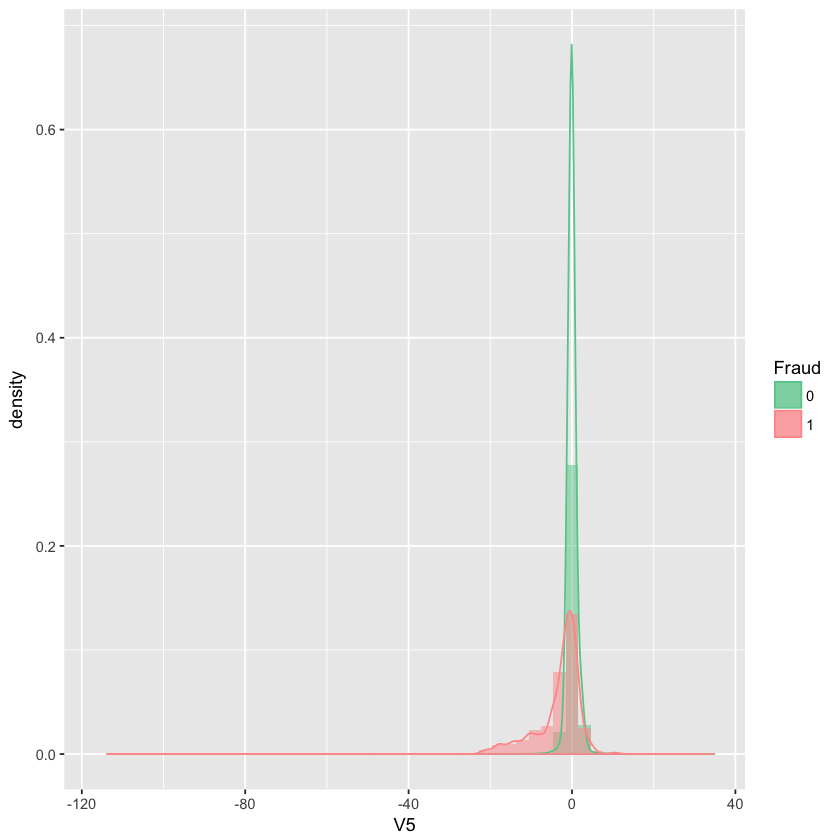

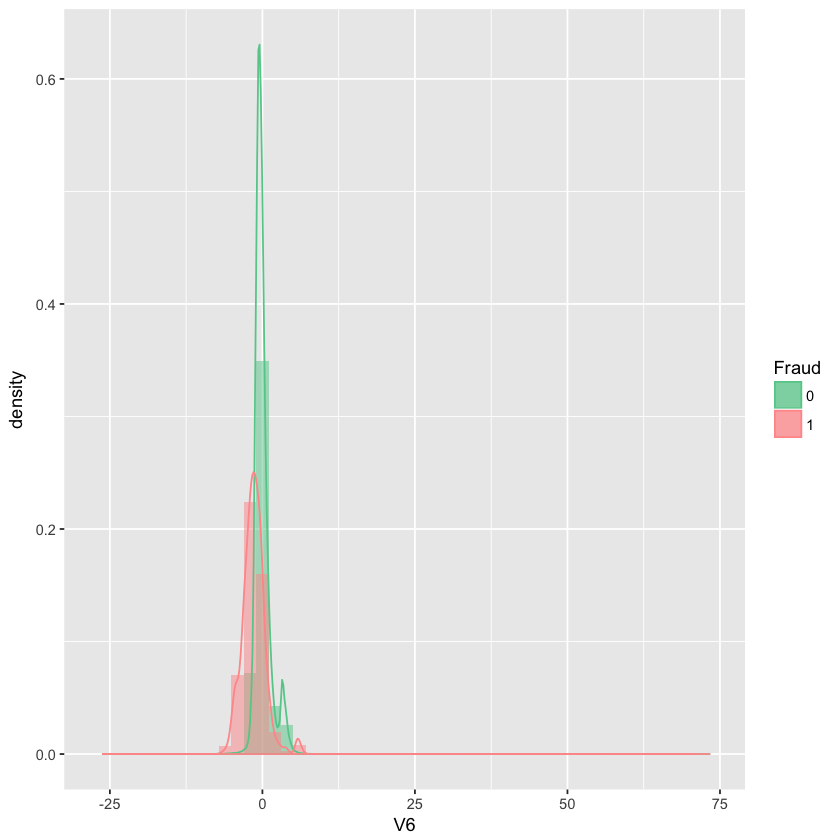

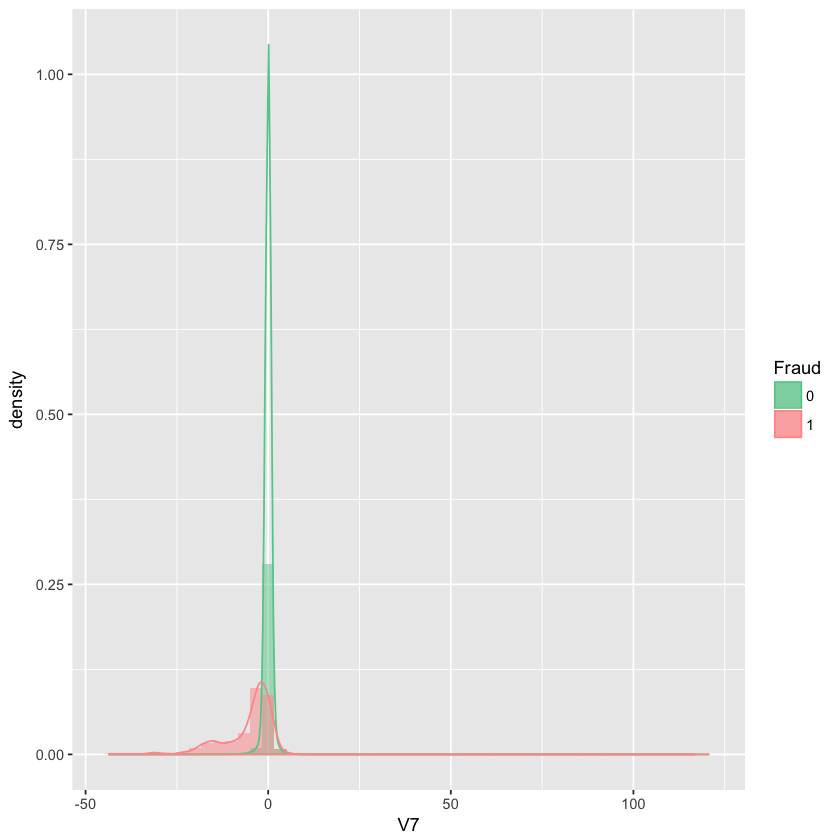

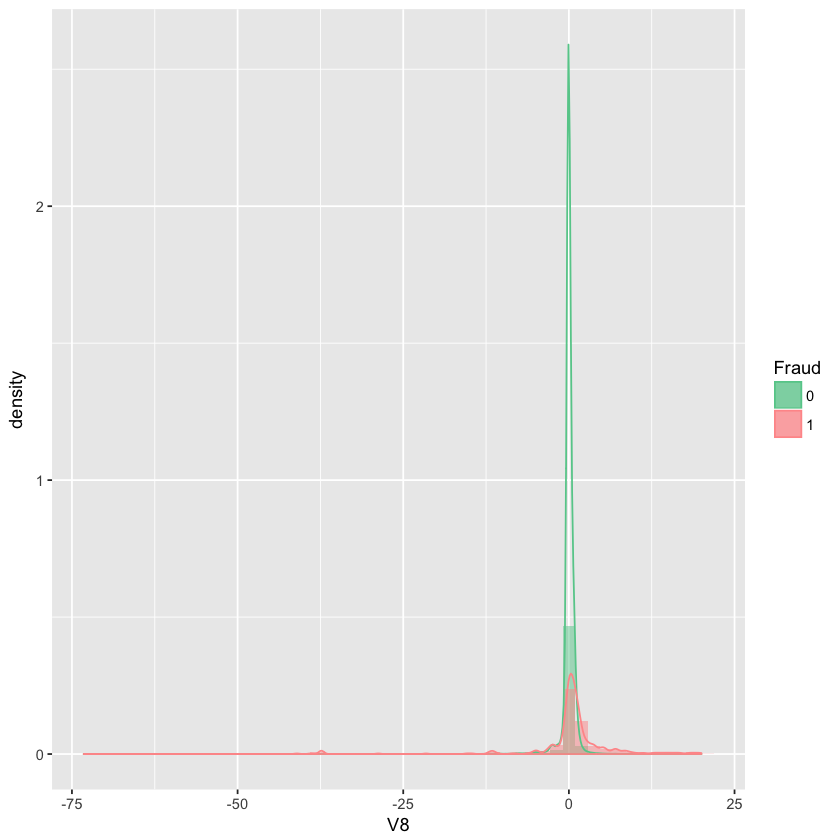

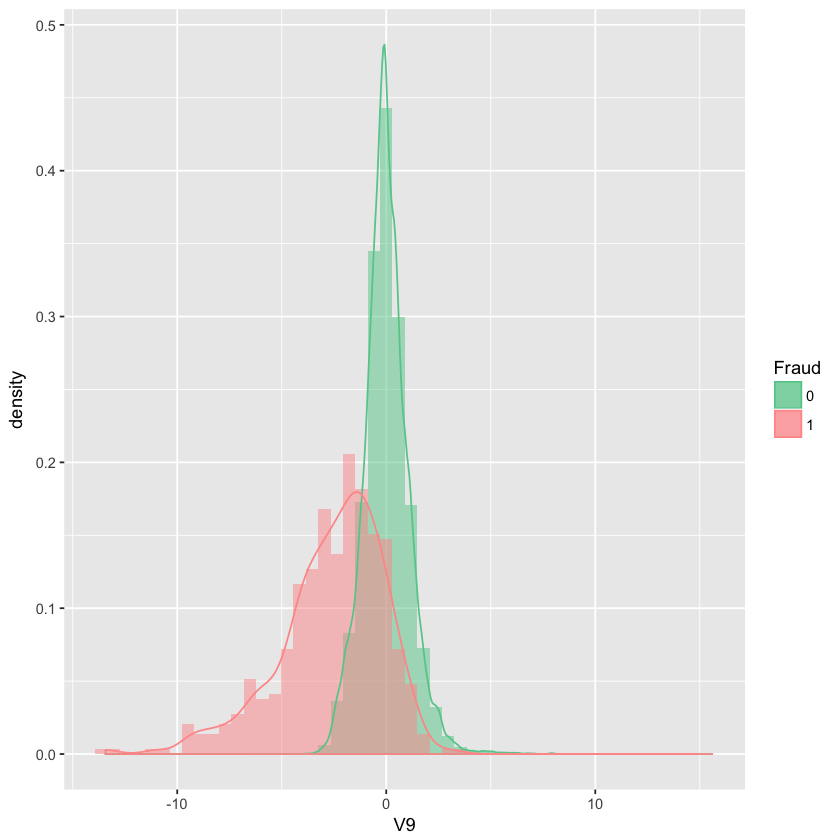

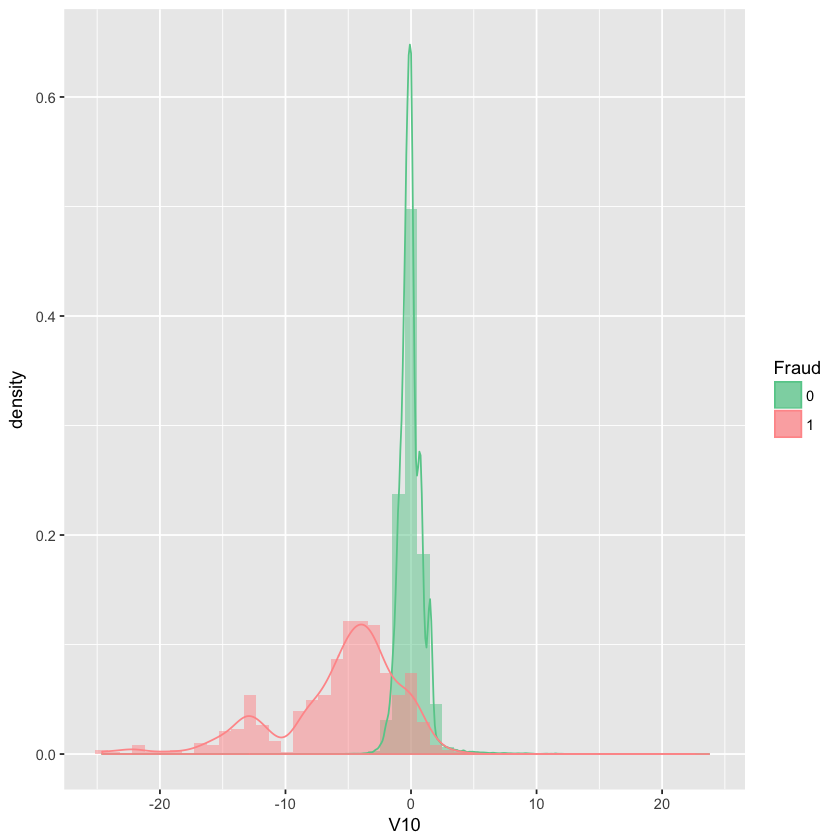

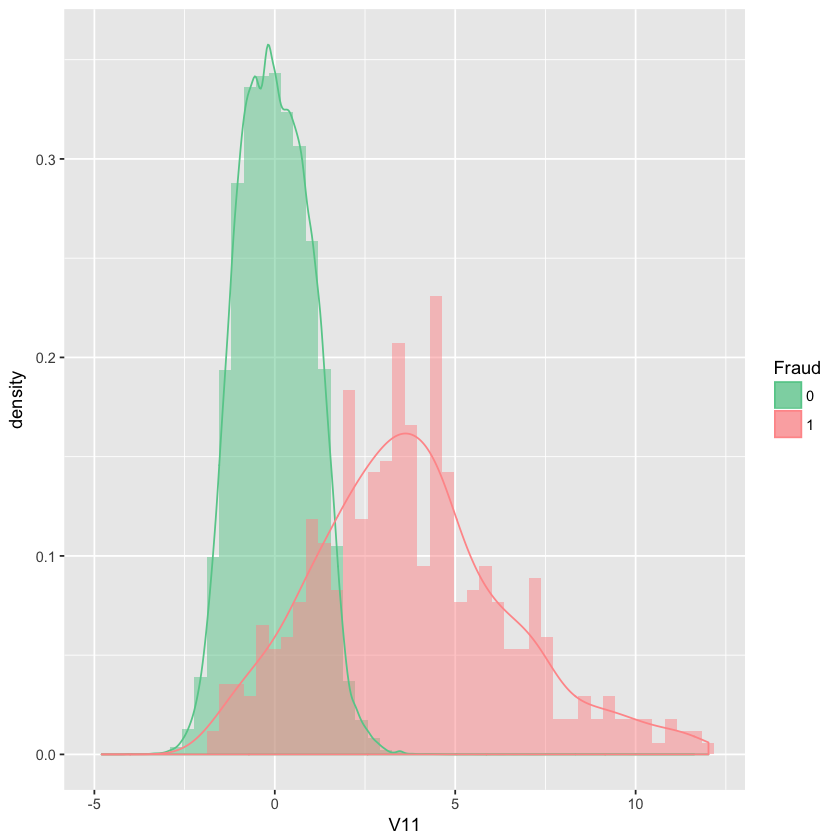

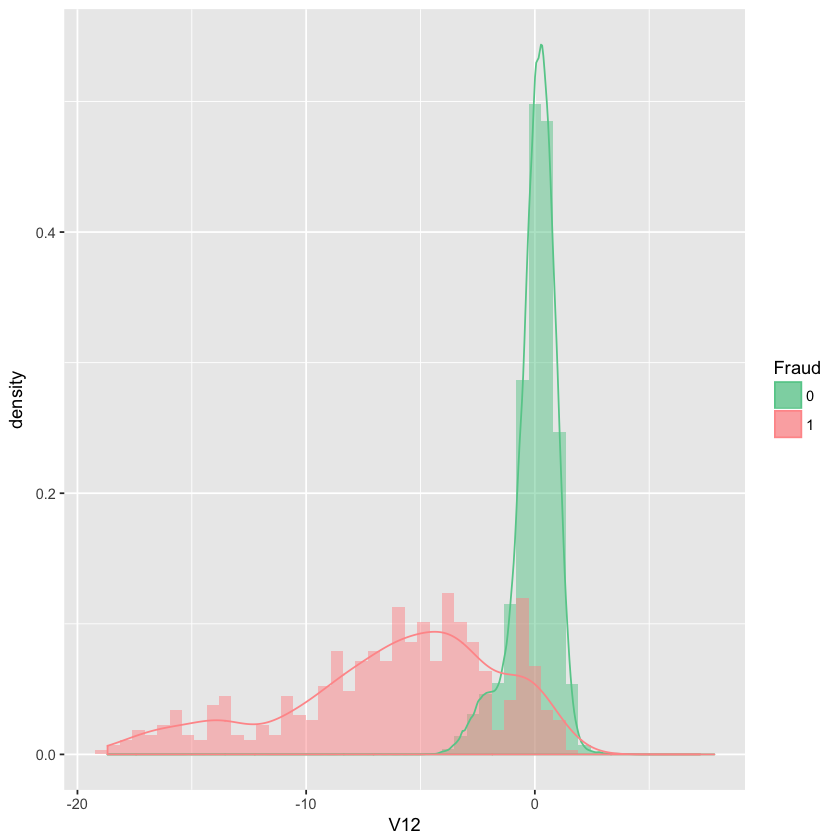

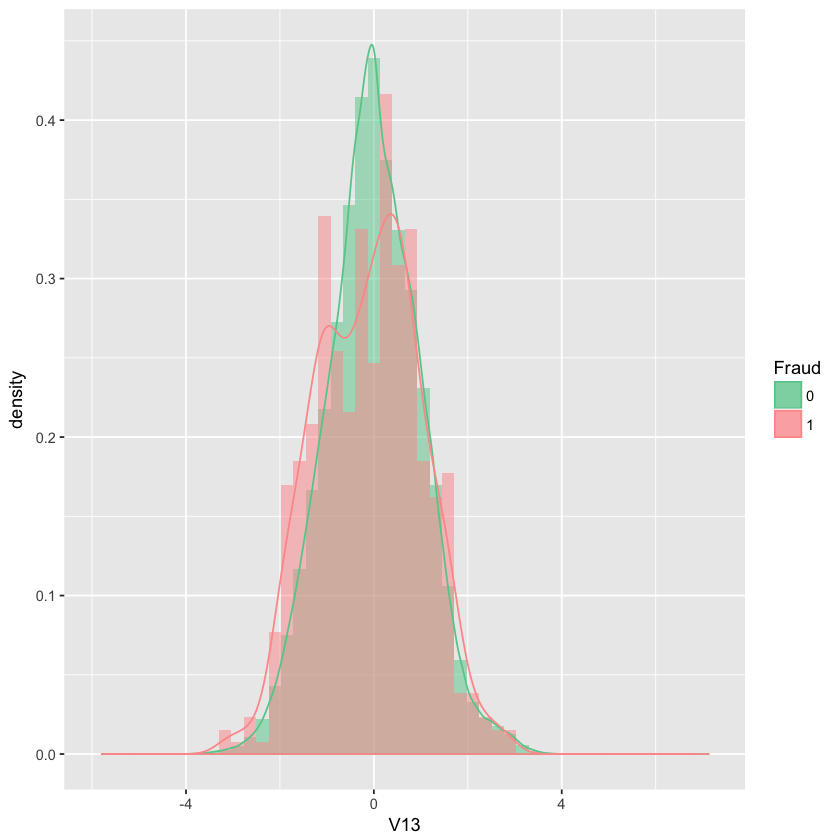

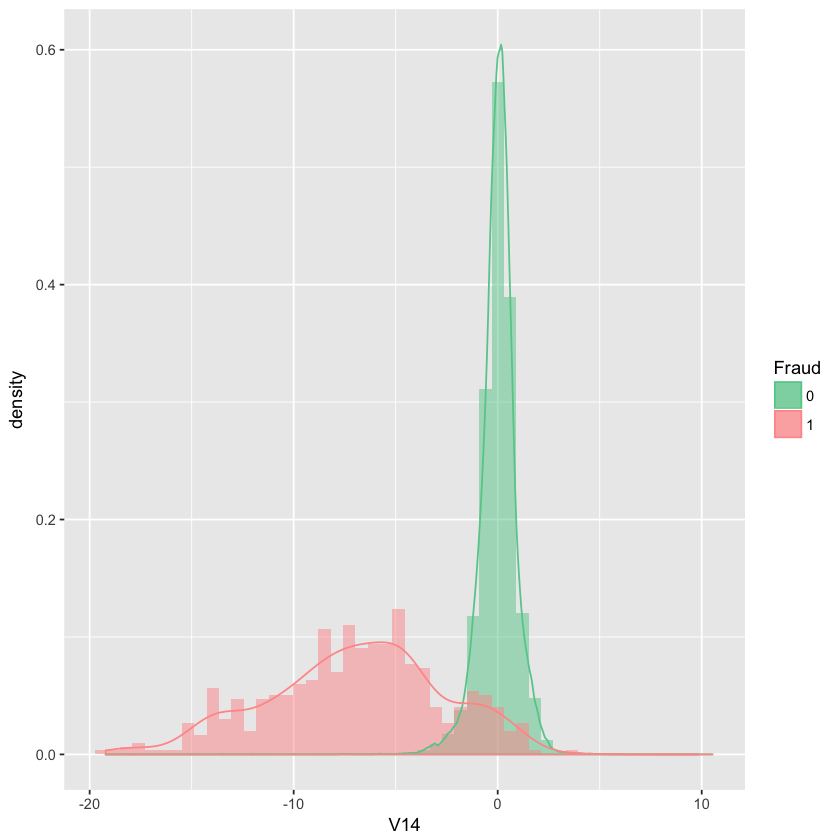

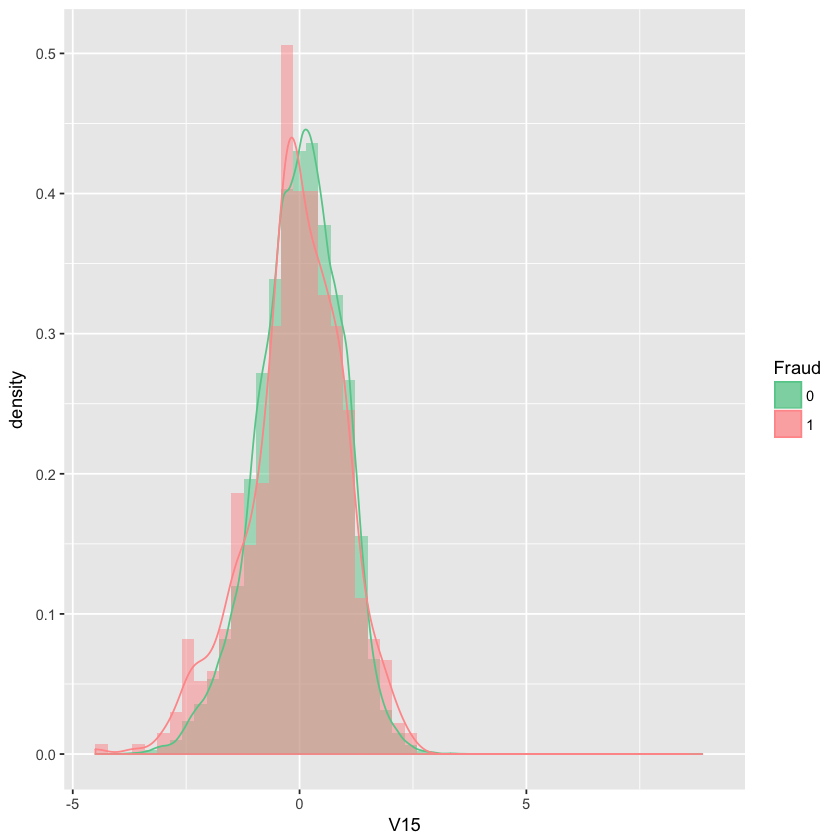

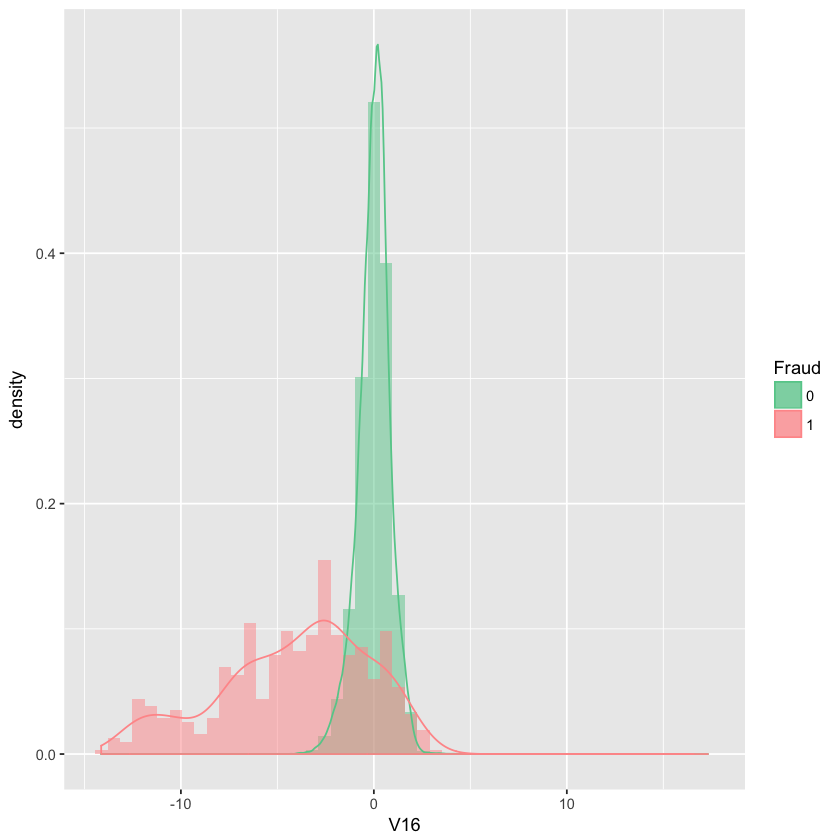

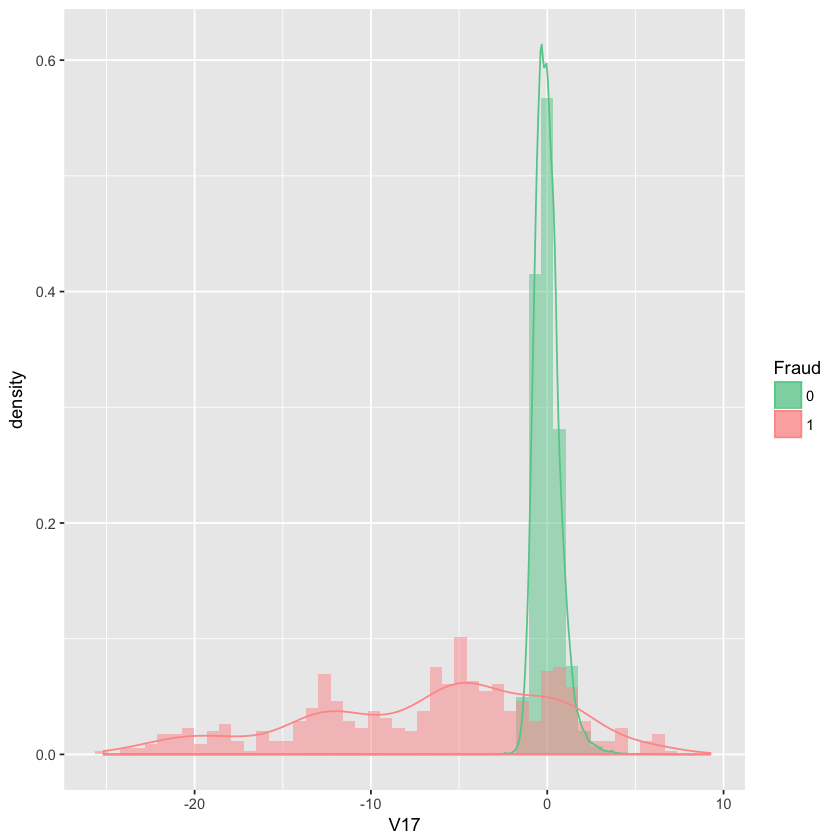

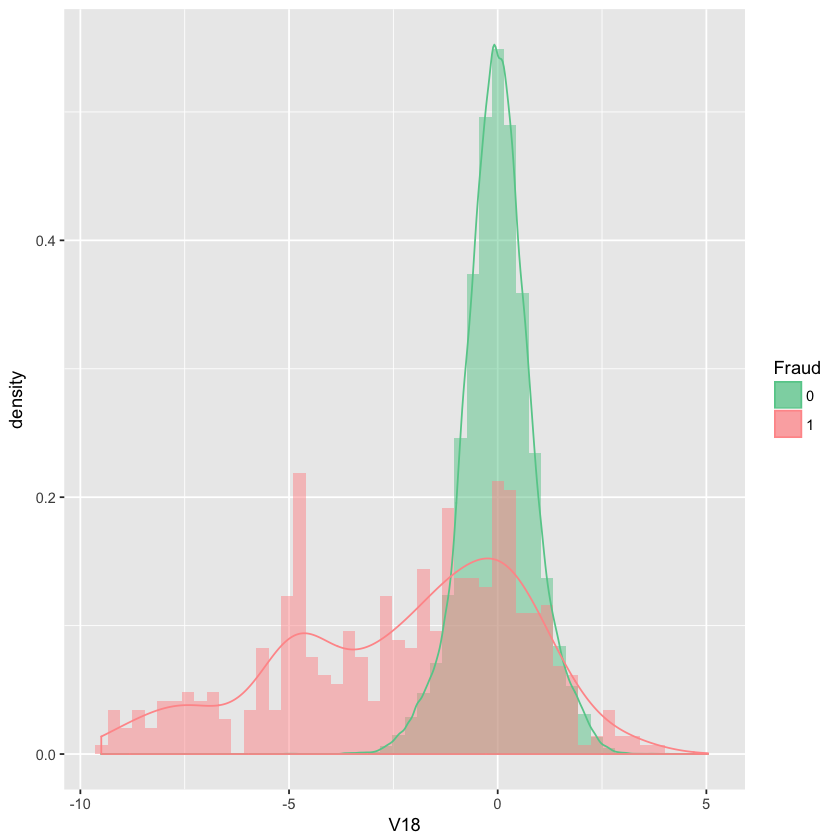

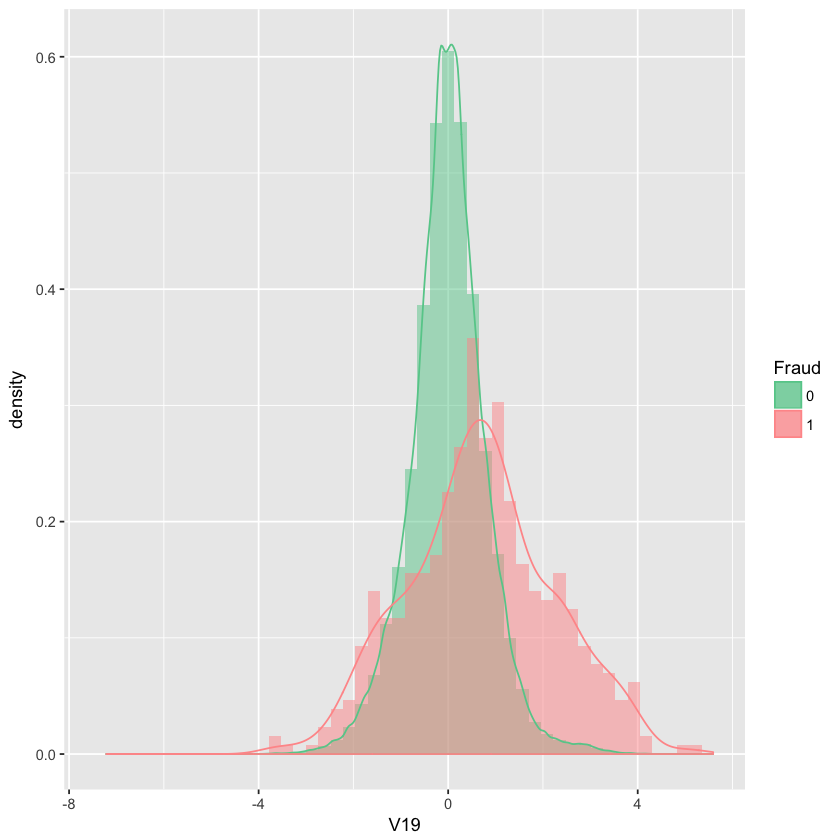

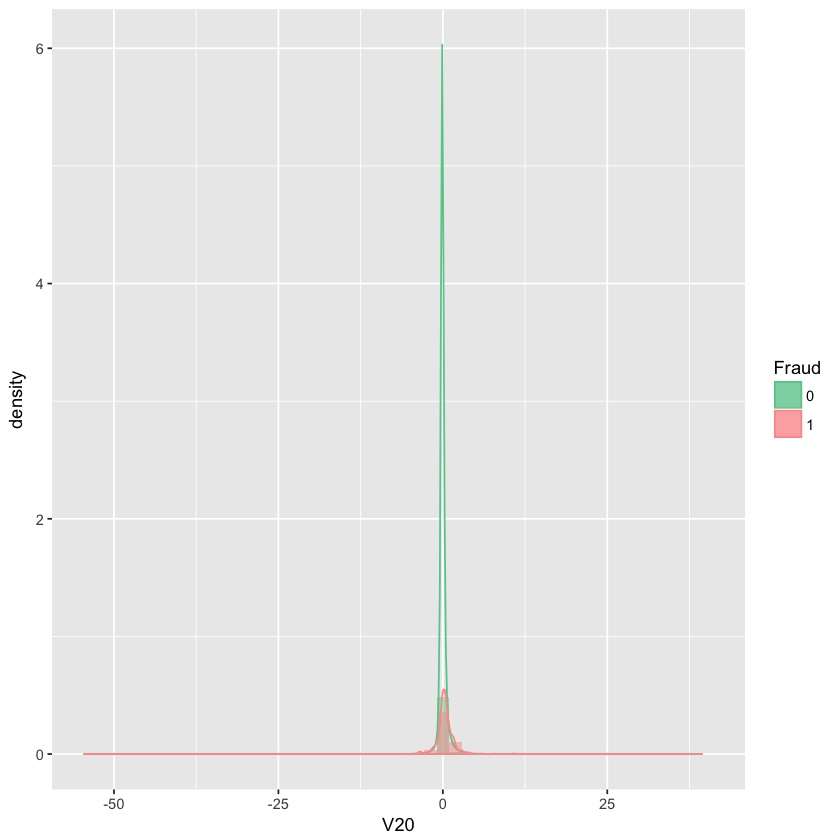

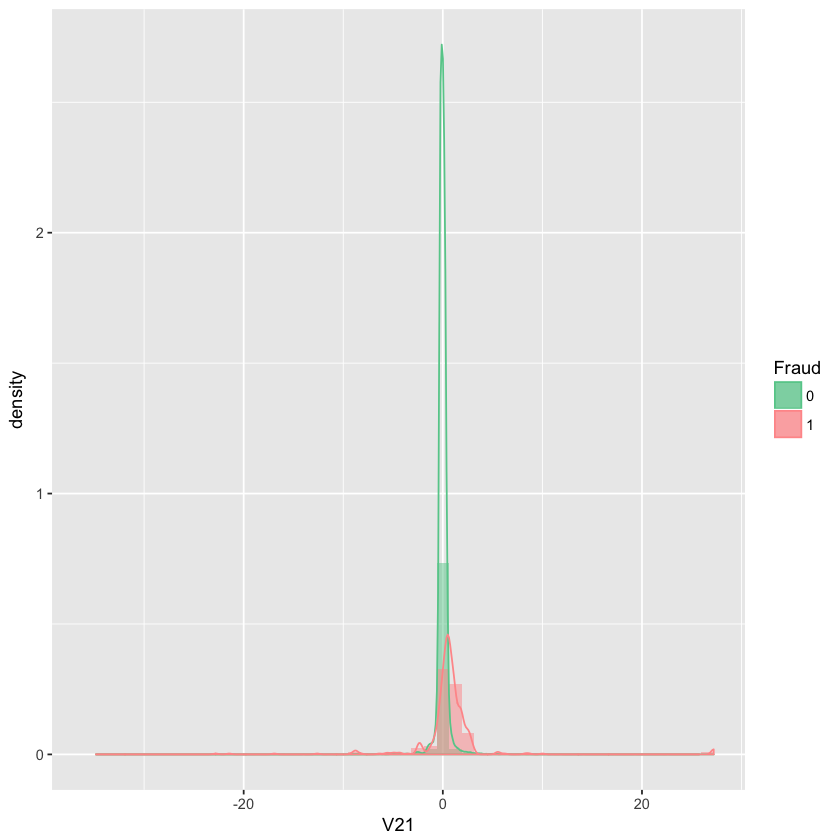

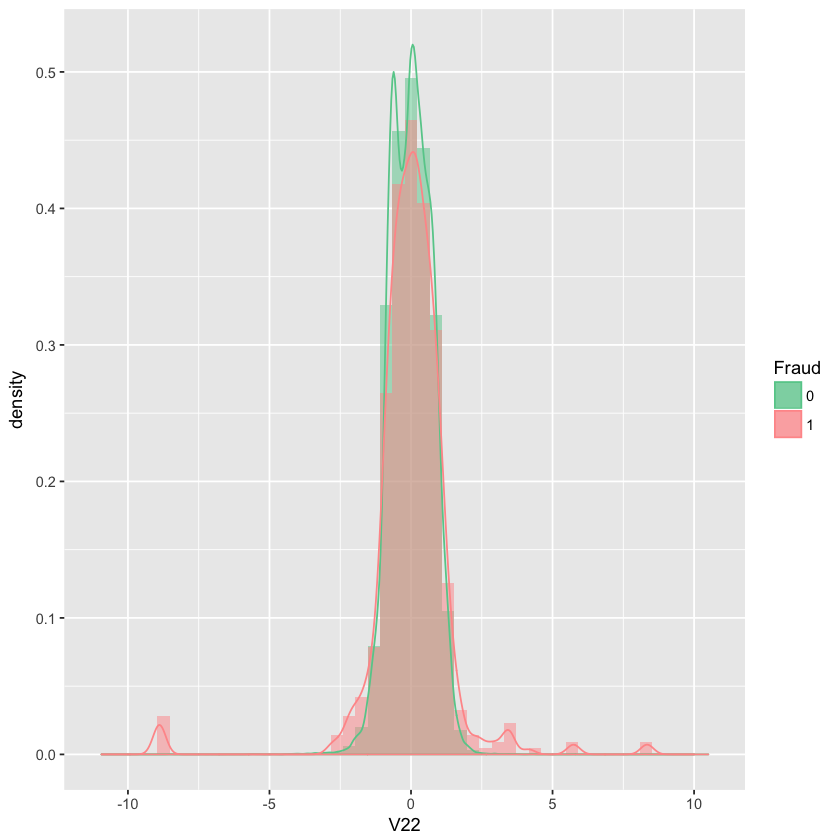

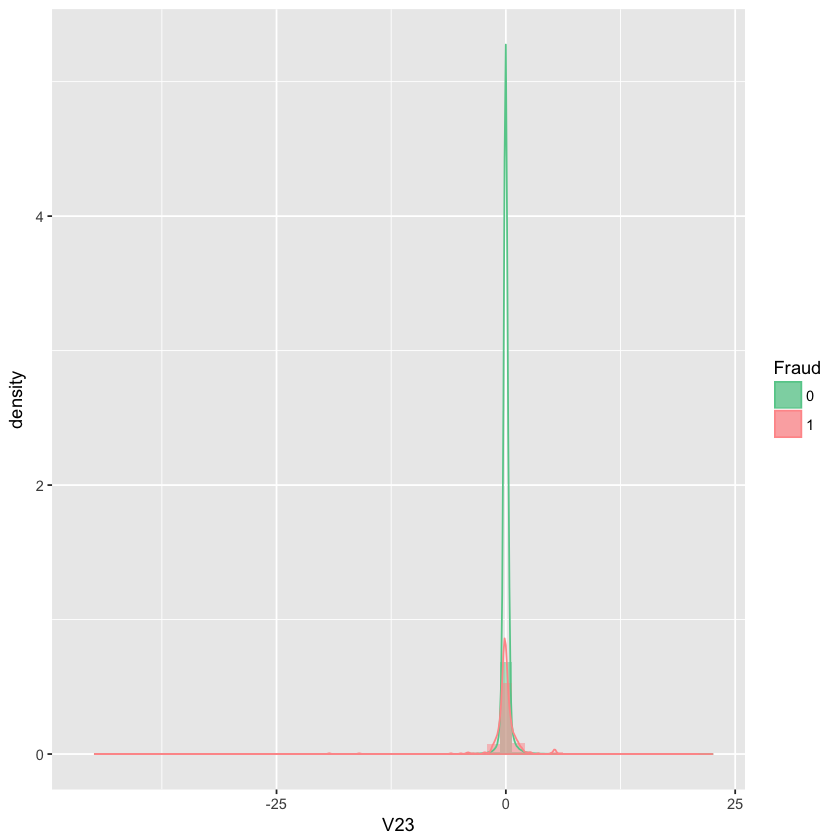

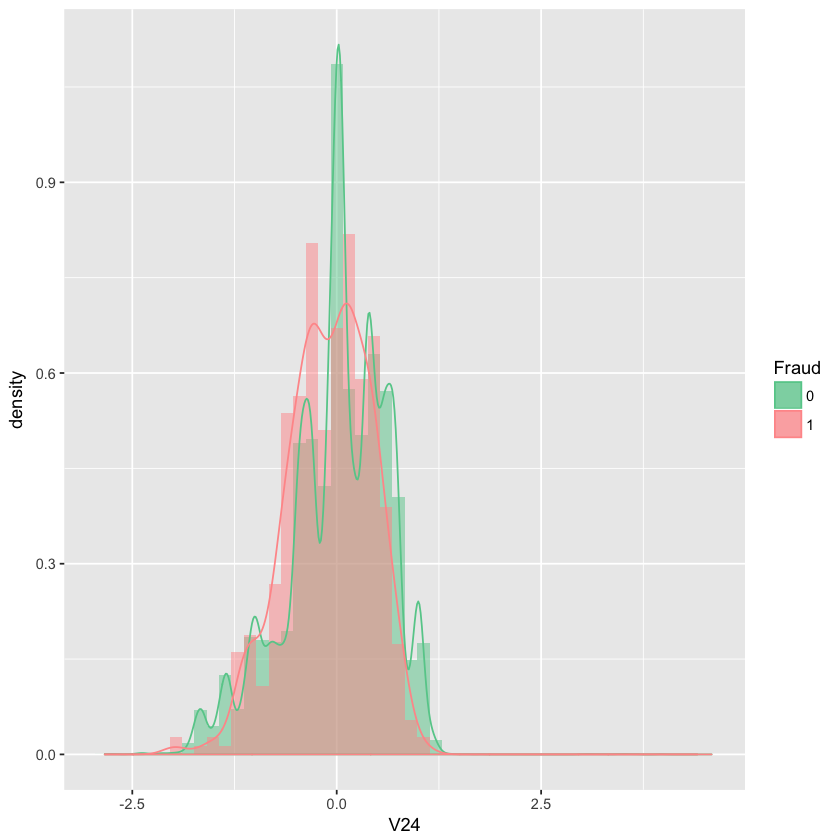

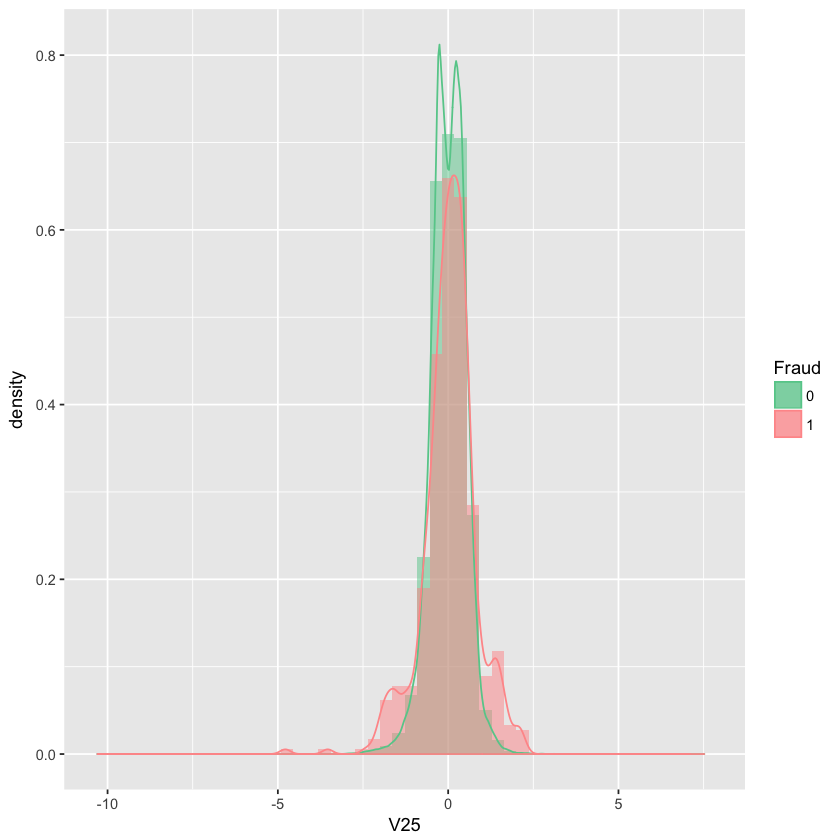

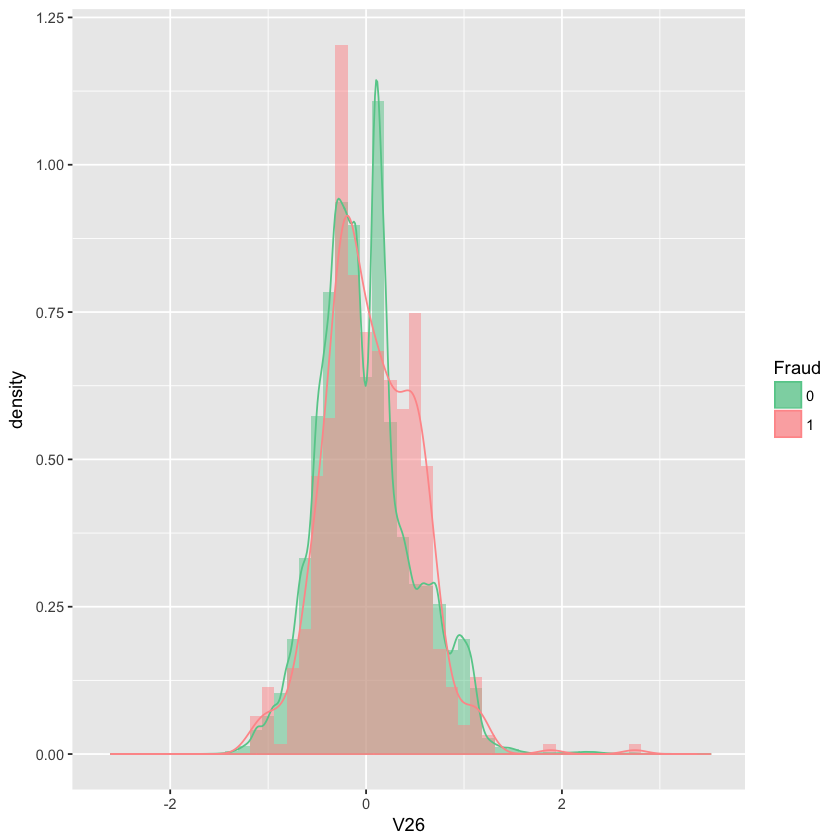

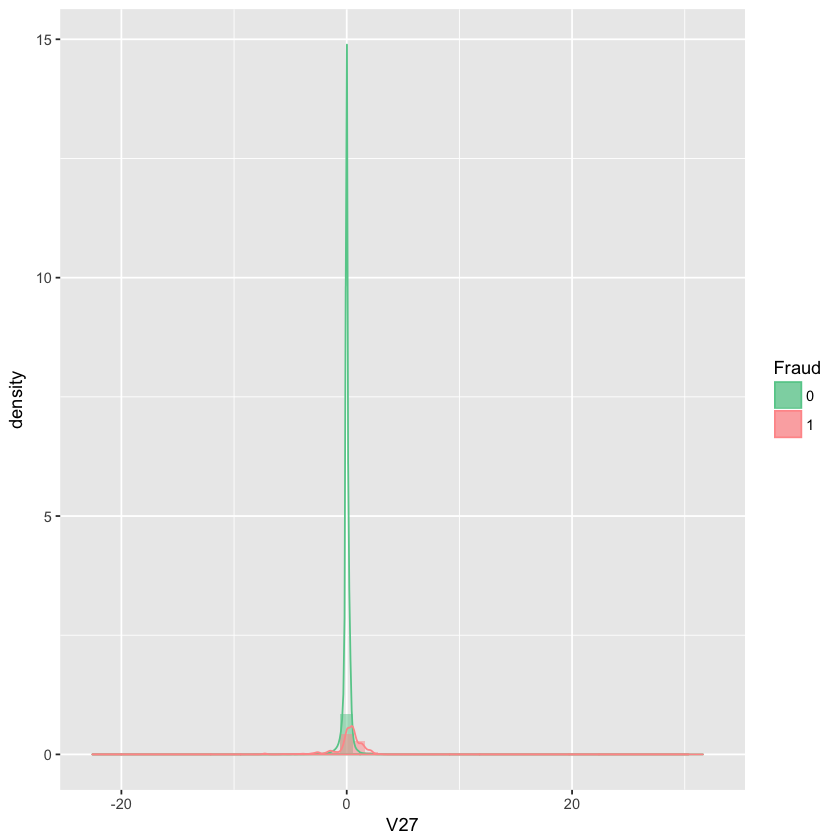

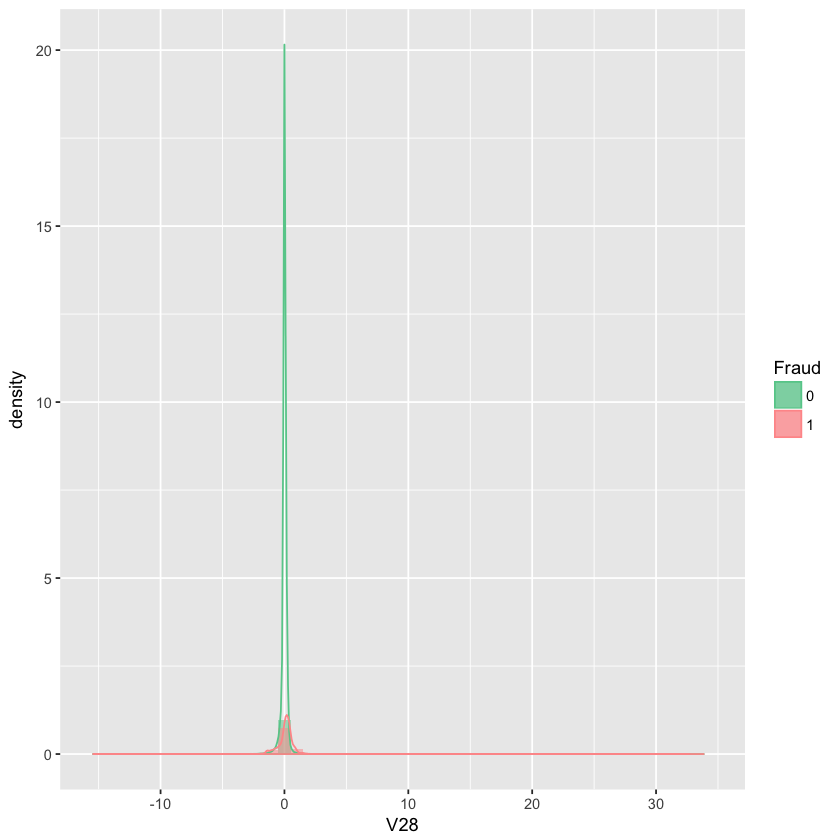

In [17]:
columns= names(data[,2:29])
for (col in columns){
  print(ggplot(data = data, aes(x = data[,col], fill = Fraud)) + 
          geom_histogram(alpha = 0.5, bins = 50,position = 'identity',aes(y = ..density..))+
          scale_fill_manual(values=c("#66CC99","#FF9999"))+
          labs( x = col)+
          geom_density(alpha = 0.5, inherit.aes = FALSE, aes(x=data[,col],colour=Fraud), data = data)+
          scale_color_manual(values=c("#66CC99","#FF9999")))
}

In [18]:
dropCol=c('V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8')
data= data[,! names(data) %in% dropCol]

In [19]:
subPositive=subset(data, data$Fraud == 0)
subNegative=subset(data, data$Fraud == 1)
subPositive=subPositive[sample(nrow(subPositive),492,replace = FALSE),]
dataSample=rbind(subNegative,subPositive)
dataSample=dataSample[sample(nrow(dataSample)),]
table(dataSample$Fraud)


  0   1 
492 492 

In [20]:
split =sample.split(dataSample$Fraud,SplitRatio = 0.7)
train=dataSample[split,]
test=dataSample[!split,]

In [21]:
model1=glm(train$Fraud~.,data = train,family ='binomial')


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [22]:
predModel=predict(model1,test,type="response")
ct = table(test$Fraud,predModel>.98); ct

   
    FALSE TRUE
  0   148    0
  1    14  134

In [23]:
accuracy = sum(ct[1,1],ct[2,2])/nrow(test); accuracy


[1] 0.9527027

In [24]:
specificity = ct[1,1]/sum(ct[1,1],ct[1,2]); specificity


[1] 1

In [25]:
sensitivity = ct[2,2]/sum(ct[2,1],ct[2,2]); sensitivity


[1] 0.9054054

In [31]:
library(randomForest)
set.seed(100)
bag = randomForest(Fraud~.,data=train,mtry = ncol(train)-1,ntree=1000)
predBag = predict(bag,newdata=test)
ct = table(test$Fraud,predBag); ct

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



   predBag
      0   1
  0 142   6
  1   7 141

In [32]:
accuracy = sum(ct[1,1],ct[2,2])/nrow(test); accuracy


[1] 0.9560811

In [33]:
specificity = ct[1,1]/sum(ct[1,1],ct[1,2]); specificity


[1] 0.9594595

In [34]:
sensitivity = ct[2,2]/sum(ct[2,1],ct[2,2]); sensitivity


[1] 0.9527027

In [37]:
set.seed(100)
forest = randomForest(Fraud~.,data=train,ntree = 1000)
predForest = predict(forest,newdata=test)
ct = table(test$Fraud,predForest); ct


   predForest
      0   1
  0 143   5
  1   8 140

In [38]:
predForest = predict(forest,newdata=data)
ct = table(data$Fraud,predForest); ct

   predForest
         0      1
  0 273509  10806
  1      8    484

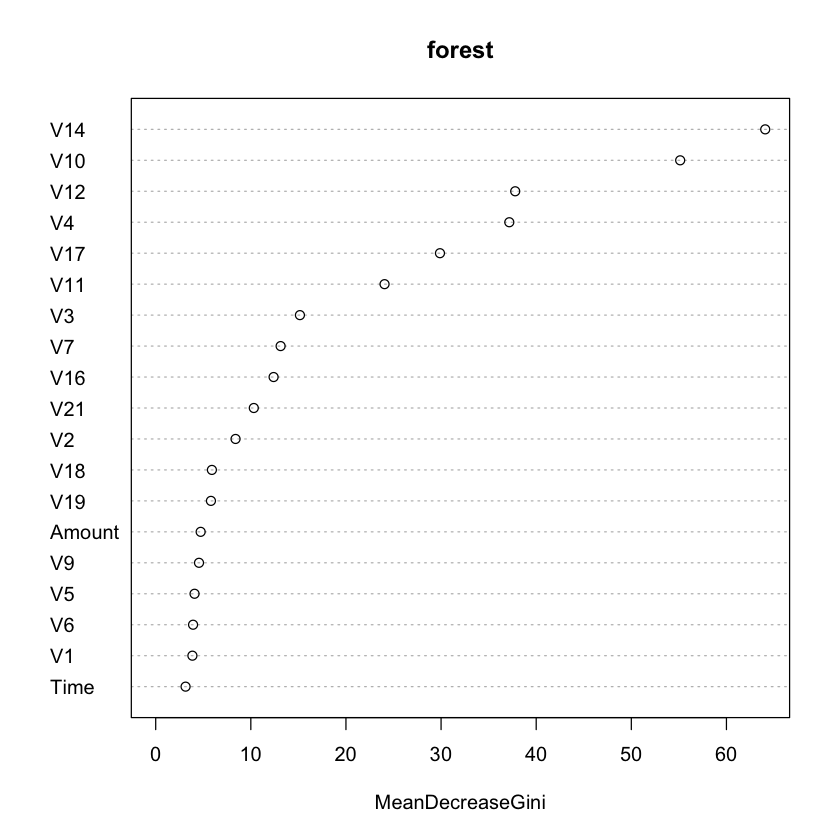

In [39]:
varImpPlot(forest); 